### Exploring Relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
     




In [1]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.1'

In [3]:
# Setting Path
path= r'/Users/pierremora/Desktop/LinkedIn Job Postings 2023'

In [4]:
# Importing dataframe
jobs_link= pd.read_csv(os.path.join(path, 'DATA', 'CLEAN DATA', 'merged_job_company_industry.csv'))

In [5]:
#checking dataframe columns
jobs_link.dtypes

Unnamed: 0                      int64
job_id                          int64
company_id                    float64
title                          object
description                    object
max_salary                    float64
min_salary                    float64
pay_period                     object
formatted_work_type            object
applies                       float64
original_listed_time            int64
remote_allowed                 object
views                         float64
application_type               object
expiry                          int64
formatted_experience_level     object
listed_time                     int64
sponsored                       int64
work_type                      object
currency                       object
compensation_type              object
job_location_city              object
job_location_state             object
industry                       object
company_name                   object
company_size                  float64
company_loca

### dropping columns 

In [13]:
# Dropping specified columns
subset_jobs_link = jobs_link.drop(columns=['job_id', 'company_id', 'listed_time', 'expiry', 
                             'original_listed_time', 'pay_period', 'description', 'Unnamed: 0',])

# Display the first few rows of the subset
subset_jobs_link_head = subset_jobs_link.head()
subset_jobs_link_head


,title,max_salary,min_salary,formatted_work_type,applies,remote_allowed,views,application_type,formatted_experience_level,sponsored,...,currency,compensation_type,job_location_city,job_location_state,industry,company_name,company_size,company_location_city,company_location_country,company_location_state
0,Sales Manager,NaN,NaN,Full-time,NaN,not_specified,NaN,ComplexOnsiteApply,NaN,0,...,NaN,NaN,Santa Clarita,California,Transportation/Trucking/Railroad,CargoLogin.,1.0,Santa Clarita,United States,California
1,Model Risk Auditor,NaN,NaN,Contract,1.0,not_specified,17.0,ComplexOnsiteApply,NaN,0,...,NaN,NaN,New York,New York,Staffing & Recruiting,Employvision Inc.,1.0,Somerset,United States,New Jersey
2,Business Manager,NaN,NaN,Full-time,NaN,not_specified,NaN,ComplexOnsiteApply,NaN,0,...,NaN,NaN,Forney,Texas,Religious Institutions,First Baptist Church Forney,2.0,Forney,United States,Texas
3,NY Studio Assistant,NaN,NaN,Full-time,NaN,not_specified,2.0,ComplexOnsiteApply,NaN,1,...,NaN,NaN,New York,New York,Design,Ken Fulk Inc,1.0,San Francisco,United States,California
4,Office Associate,42000.0,37000.0,Full-time,5.0,not_specified,49.0,ComplexOnsiteApply,NaN,1,...,USD,BASE_SALARY,Albany,Georgia,Retail,Sunnyland Farms,2.0,Albany,United States,Georgia


### Checking relationships

In [14]:
# Select only numeric columns
numeric_df = subset_jobs_link.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

correlation_matrix




,max_salary,min_salary,applies,views,sponsored,company_size
max_salary,1.000000,0.918285,0.044101,0.139684,0.012642,0.094480
min_salary,0.918285,1.000000,0.056989,0.159218,0.021715,0.015717
applies,0.044101,0.056989,1.000000,0.857720,0.042957,-0.110571
views,0.139684,0.159218,0.857720,1.000000,0.076766,-0.123311
sponsored,0.012642,0.021715,0.042957,0.076766,1.000000,-0.001386
company_size,0.094480,0.015717,-0.110571,-0.123311,-0.001386,1.000000


to compute a correlation matrix, we should only consider columns with numeric data. If we try to include columns with non-numeric data types, we will encounter errors.

### creating a correlation heatmap using seaborn

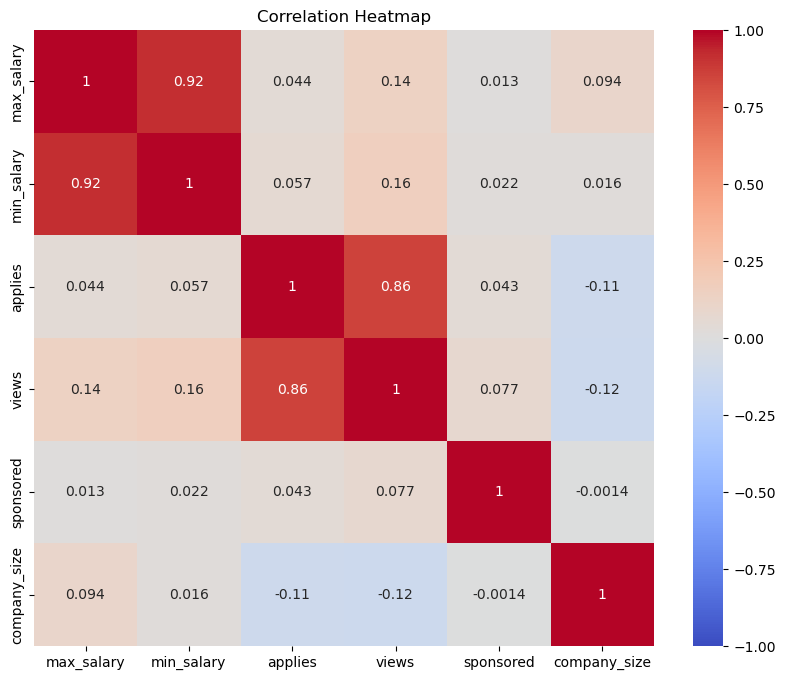

In [15]:

# Computing the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


### Notes:
max_salary and min_salary: These have a very high positive correlation (close to 1). This suggests that job listings with higher minimum salaries also tend to have higher maximum salaries. This is an expected relationship because salary ranges tend to move together.

views and applies: These also show a positive correlation, though not as strong as salaries. This indicates that job listings with more views tend to receive more applications. This is intuitive because the more people see a job listing, the higher the chance that some of them will apply.

views and company_size: This relationship is slightly negative. It suggests that larger companies, on average, might have slightly fewer views per job listing than smaller ones. However, this relationship is not very strong and could be influenced by other factors.

applies and company_size: This also has a slightly negative correlation. Larger companies might receive slightly fewer applications per job listing than smaller ones, but again, the relationship is not very strong.
sponsored doesn't seem to have a strong correlation with any other variables in the heatmap.

### Creating Scatterplot for the strongest correlations

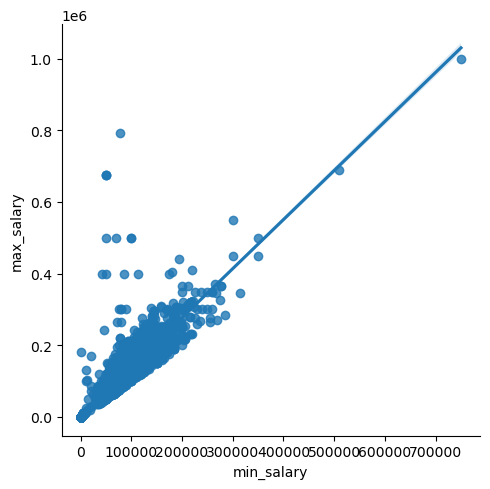

In [17]:
# Creating a scatterplot for the "min_salary" and "max_salary" columns in seaborn

sns.lmplot(x = 'min_salary', y = 'max_salary', data = numeric_df)

### Note:
As can be observed, there's a clear positive linear trend, which matches our earlier observation from the heatmap that these two variables are strongly positively correlated. This means that as the minimum salary for a job listing increases, the maximum salary tends to increase as well.

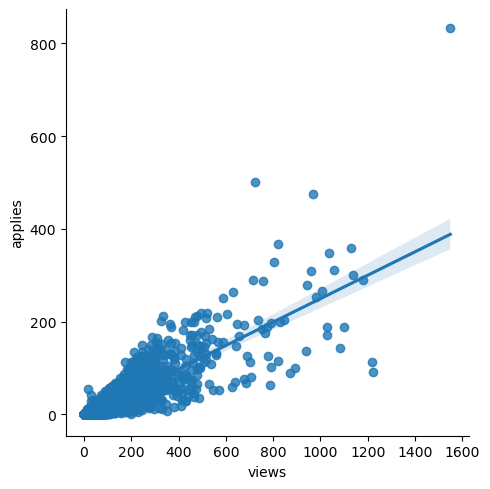

In [20]:
# Creating a scatterplot for the "views" and "applies" columns in seaborn

sns.lmplot(x = 'views', y = 'applies', data = numeric_df)

Note: From the plot, we can observe a positive trend, indicating that job listings with more views tend to receive more applications. This is consistent with 
our expectations and the correlation we observed earlier.

In [22]:


# Construct the full path using os.path.join
save_path = os.path.join(path, 'ANALYSIS', 'Visualizations')



# Save the correlation heatmap
heatmap_path = os.path.join(save_path, 'correlation_heatmap.png')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.savefig(heatmap_path)
plt.close()

# Save the scatterplot for min_salary vs. max_salary
min_max_salary_path = os.path.join(save_path, 'min_max_salary_scatterplot.png')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=numeric_df, x='min_salary', y='max_salary')
plt.title('Scatterplot of min_salary vs. max_salary')
plt.xlabel('Minimum Salary')
plt.ylabel('Maximum Salary')
plt.savefig(min_max_salary_path)
plt.close()

# Save the scatterplot for views vs. applies
views_applies_path = os.path.join(save_path, 'views_applies_scatterplot.png')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=numeric_df, x='views', y='applies')
plt.title('Scatterplot of views vs. applies')
plt.xlabel('Views')
plt.ylabel('Applies')
plt.savefig(views_applies_path)
plt.close()




### Creating a pair plot


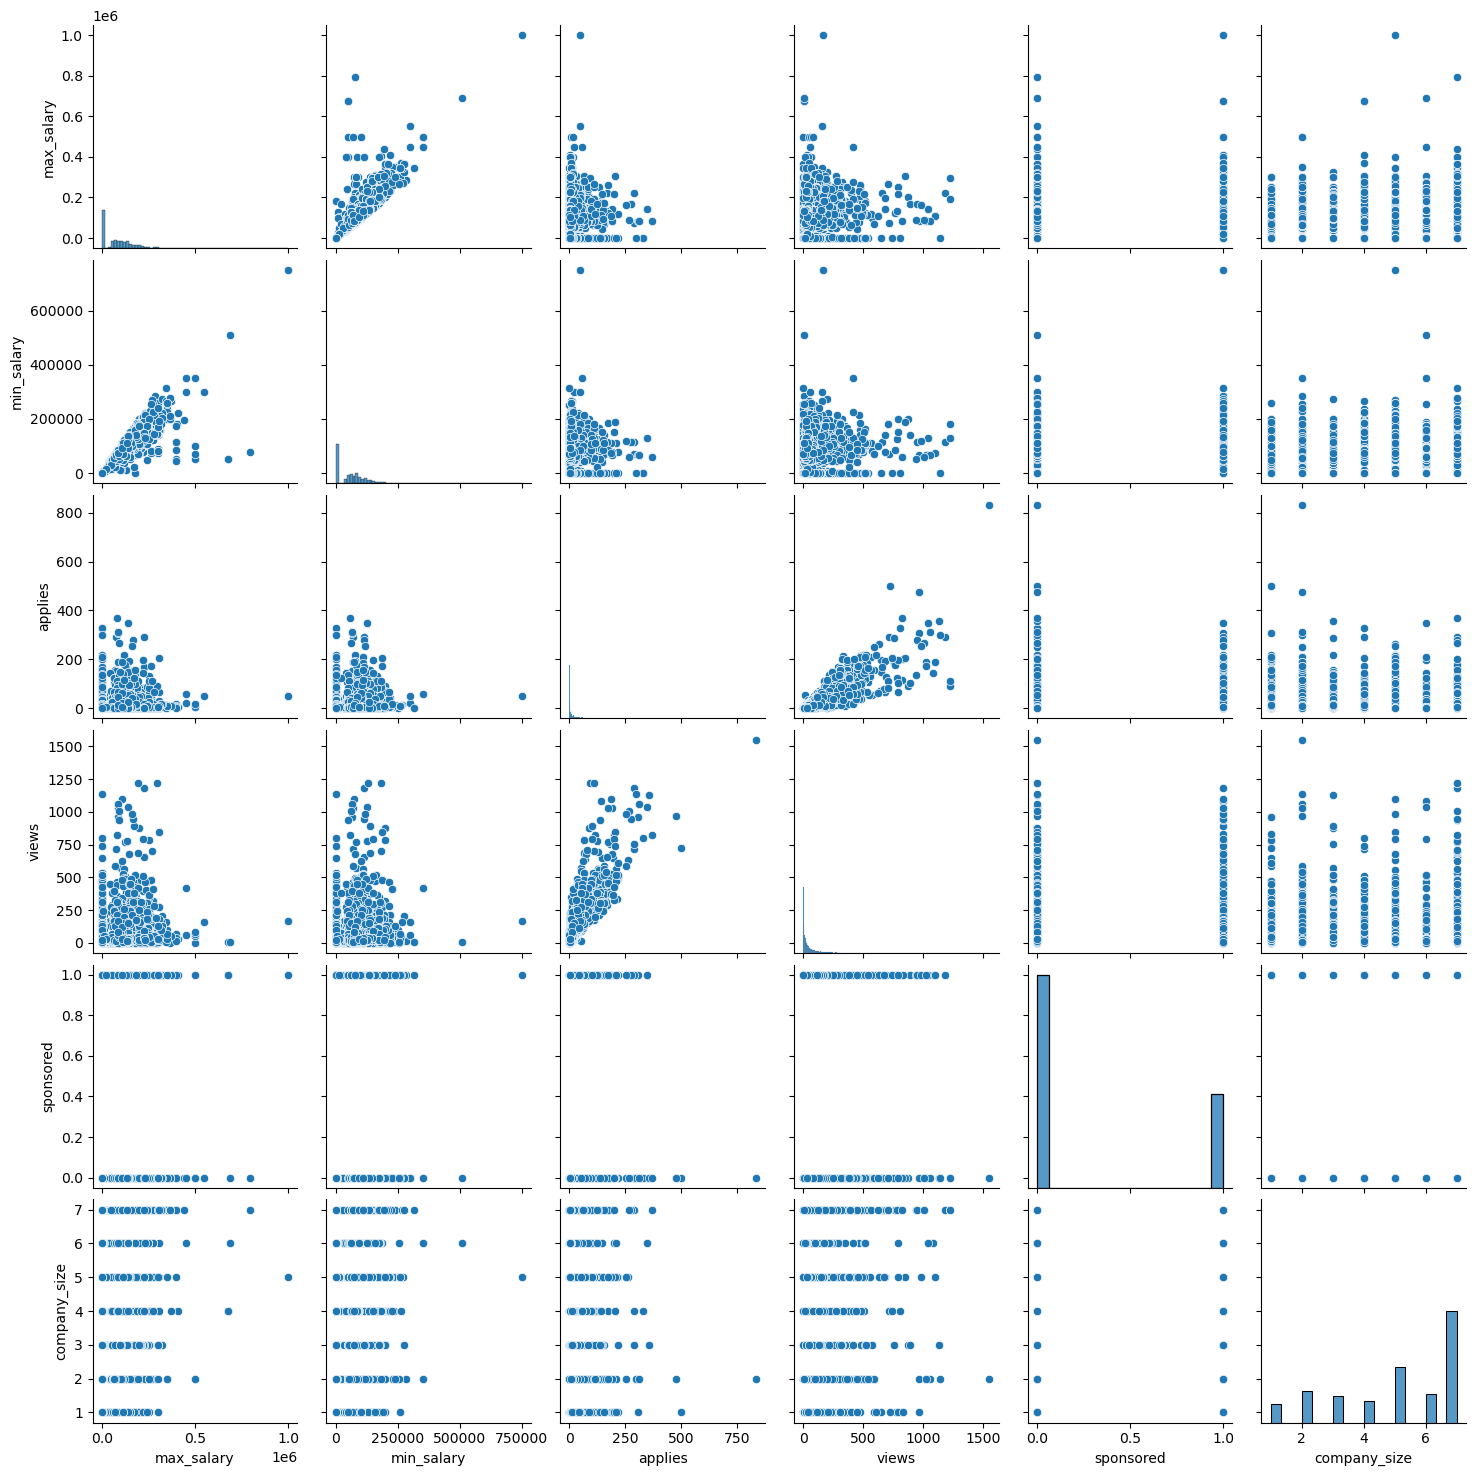

In [23]:
g = sns.pairplot(subset_jobs_link)

### Creating a categorical plot and interpreting the results.

The idea was to create histograms for the max_salary distribution for each of the top 10 industries. This would allow us to see the distribution and spread of maximum salaries within these industries.

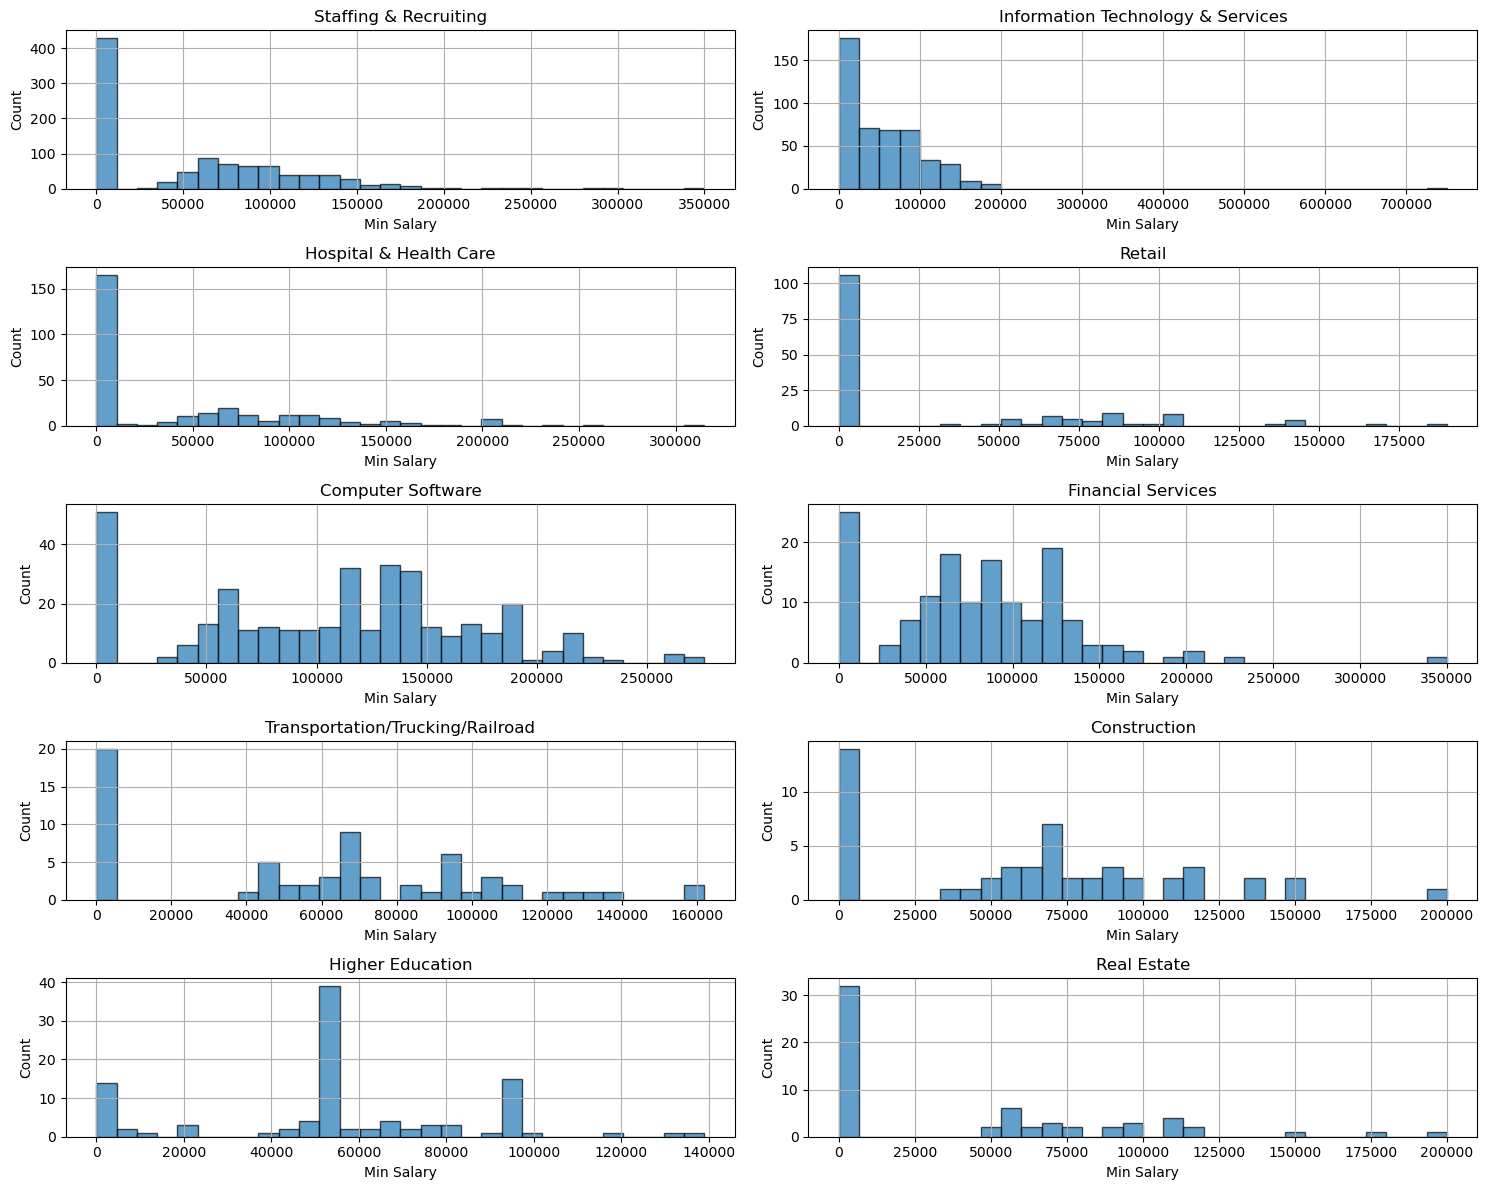

In [30]:

# Plot histograms for min_salary for each of the top 10 industries
plt.figure(figsize=(15, 12))

# Loop through top industries to create subplots
for idx, industry in enumerate(top_industries, 1):
    plt.subplot(5, 2, idx)
    subset_jobs_link[subset_jobs_link['industry'] == industry]['min_salary'].dropna().hist(bins=30, edgecolor='black', alpha=0.7)
    plt.title(industry)
    plt.xlabel('Min Salary')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

The idea was to create histograms for the min_salary distribution for each of the top 10 industries. This would allow us to see the distribution and spread of minimum salaries within these industries.

### Creating a histoplot showing the distribution of min_salary across different salary ranges for the "Information Technology & Services" industry.

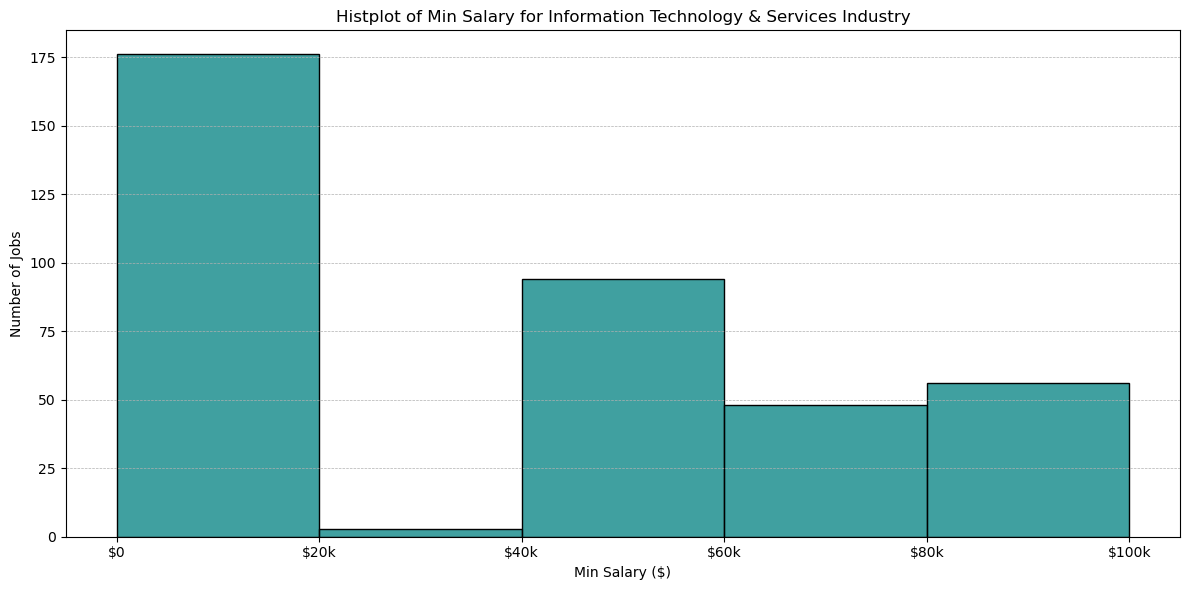

In [35]:
# Filtering for the "Information Technology & Services" industry
it_services_data = subset_jobs_link[subset_jobs_link['industry'] == "Information Technology & Services"]

# Using Seaborn's histplot to plot the distribution of min_salary
plt.figure(figsize=(12, 6))
sns.histplot(it_services_data['min_salary'], bins=[0, 20000, 40000, 60000, 80000, 100000, max(it_services_data['min_salary'])+1], color='teal', edgecolor='k')
plt.title('Histplot of Min Salary for Information Technology & Services Industry')
plt.xlabel('Min Salary ($)')
plt.ylabel('Number of Jobs')
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)
plt.xticks([0, 20000, 40000, 60000, 80000, 100000, max(it_services_data['min_salary'])], ['$0', '$20k', '$40k', '$60k', '$80k', '$100k', '$100k+'])
plt.tight_layout()
plt.show()




#### NOTES: 
Dominant Salary Range: The majority of job positions in the "Information Technology & Services" industry offer a minimum salary in the $0 - $20k range. This suggests that there are a significant number of entry-level or possibly part-time positions in this industry.

Mid-tier Salary Range: There is also a substantial number of positions that offer a minimum salary in the $20k - $40k range, indicating a presence of mid-level roles.

Diminishing Higher Salaries: As the salary range increases (e.g., $40k - $60k, $60k - $80k, etc.), the number of job positions tends to decrease. This is expected as higher salary ranges typically correspond to senior or specialized roles, which are fewer in number compared to entry or mid-level roles.

Limited Top-tier Salaries: Very few positions offer a minimum salary above $100k, underscoring the rarity of such high-paying roles within the industry. These might represent executive or highly specialized technical roles.
Overall Distribution: The overall distribution of minimum salaries is right-skewed, meaning there are more job positions at the lower salary ranges and fewer as the salary increases.

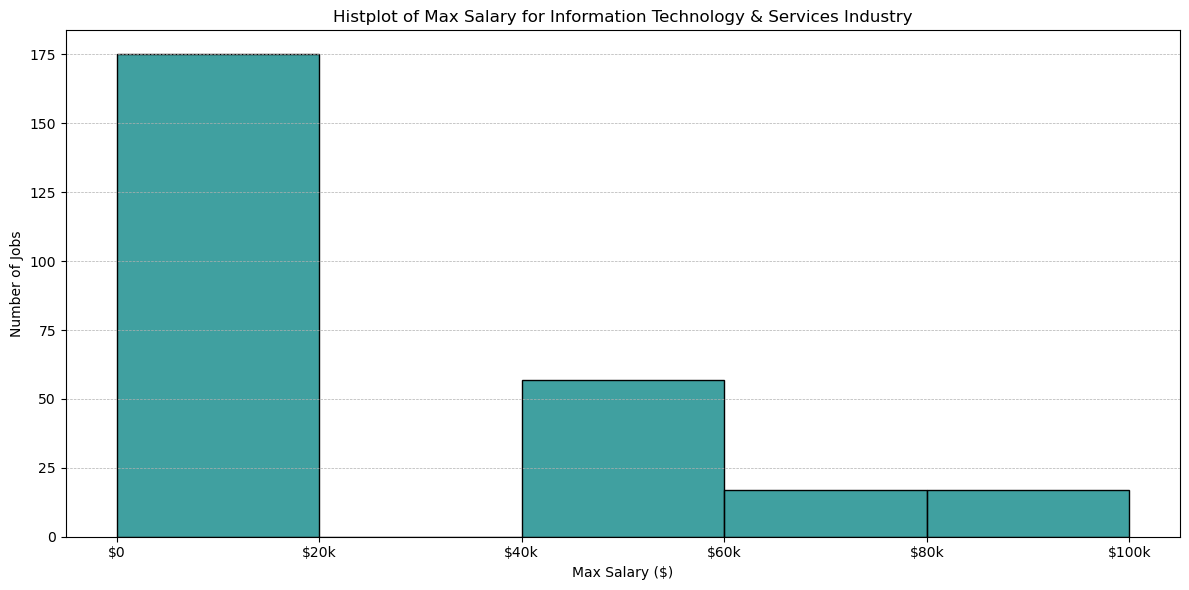

In [37]:
# Filtering for the "Information Technology & Services" industry
it_services_data = subset_jobs_link[subset_jobs_link['industry'] == "Information Technology & Services"]

# Using Seaborn's histplot to plot the distribution of min_salary
plt.figure(figsize=(12, 6))
sns.histplot(it_services_data['max_salary'], bins=[0, 20000, 40000, 60000, 80000, 100000, max(it_services_data['min_salary'])+1], color='teal', edgecolor='k')
plt.title('Histplot of Max Salary for Information Technology & Services Industry')
plt.xlabel('Max Salary ($)')
plt.ylabel('Number of Jobs')
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)
plt.xticks([0, 20000, 40000, 60000, 80000, 100000, max(it_services_data['min_salary'])], ['$0', '$20k', '$40k', '$60k', '$80k', '$100k', '$100k+'])
plt.tight_layout()
plt.show()

#### NOTES:
Dominant Salary Range: The majority of job positions have a maximum salary in the $0 - $20k range. This might include roles that have a fixed salary without performance-based bonuses or roles that are part-time.

Mid to High Salary Range: There's a significant number of job positions that offer a maximum salary in the $20k - $40k and $40k - $60k ranges. This indicates the presence of mid-level roles and some senior roles.
Senior Roles: The $60k - $80k and $80k - $100k ranges have fewer positions, suggesting these might correspond to more senior or specialized roles within the industry.

Top-tier Salaries: Similar to the minimum salary distribution, there are very few positions with a maximum salary above $100k, emphasizing the exclusivity of such high-paying roles. These could be top executive or highly specialized technical roles.

Overall Distribution: The distribution of maximum salaries is also right-skewed, much like the minimum salaries. This indicates a higher concentration of job positions at the lower to mid salary ranges and fewer as the salary increases.

### Explanation:
The discrepancy between lower max_salary and higher min_salary for jobs in the IT industry might seem counterintuitive at first, but there are several potential explanations for this:

Different Types of Roles: The IT industry is diverse, with a wide range of roles from entry-level positions to specialized and senior roles. It's possible that the jobs with a lower max_salary are specific roles (e.g., internships, part-time roles, or roles in smaller markets or companies) where the expected maximum pay is lower. On the other hand, roles with a higher min_salary might be more specialized or in-demand positions.

Job Duration: Temporary or contract roles in the IT industry might have a lower max_salary due to their short duration, while permanent roles might offer a higher min_salary.

## Question to analyze:
### Is the IT industry the leading sector in terms of the number of job offers on LinkedIn, compared to all other industries?

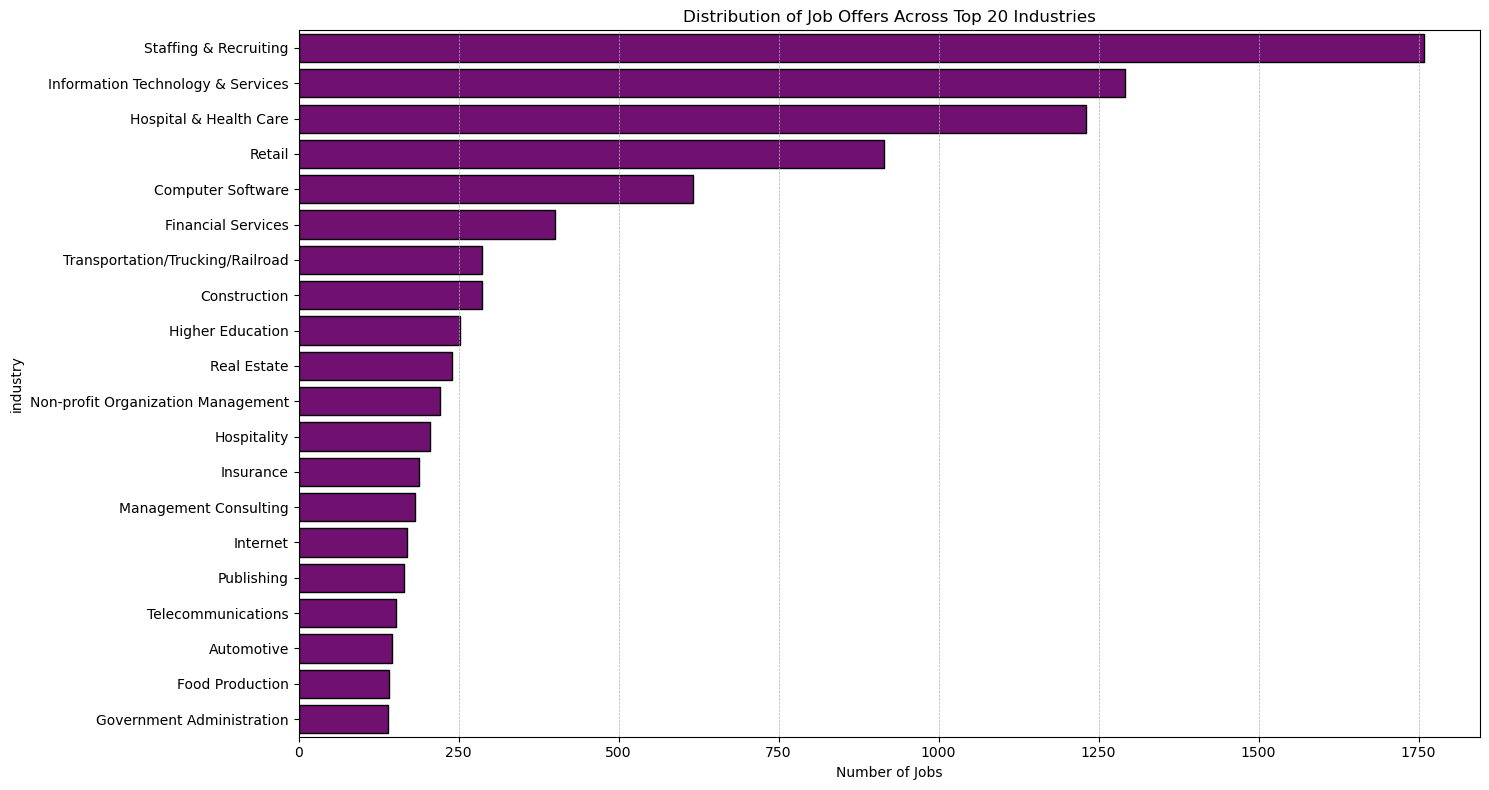

In [38]:

# Selecting the top 20 industries by the number of job offers
top_20_industries = subset_jobs_link['industry'].value_counts().head(20).index

# Filtering the data for these top 20 industries
top_20_data = subset_jobs_link[subset_jobs_link['industry'].isin(top_20_industries)]

# Plotting a histplot for the distribution of job offers across the top 20 industries
plt.figure(figsize=(15, 8))
industry_order = top_20_data['industry'].value_counts().index  # Ordering industries by count
sns.countplot(data=top_20_data, y='industry', order=industry_order, color='purple', edgecolor='k')
plt.title('Distribution of Job Offers Across Top 20 Industries')
plt.xlabel('Number of Jobs')
plt.grid(axis='x', which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


#### NOTES:

The "Information Technology & Services" industry is prominently displayed, making it one of the leading industries in terms of job offers.

While the IT industry has a significant number of job offers,its the second industry, not the first, other industries such as "Financial Services" and "Hospital & Health Care" also have a considerable presence.

### On average, do IT job offers propose a higher salary than job offers from other industries?

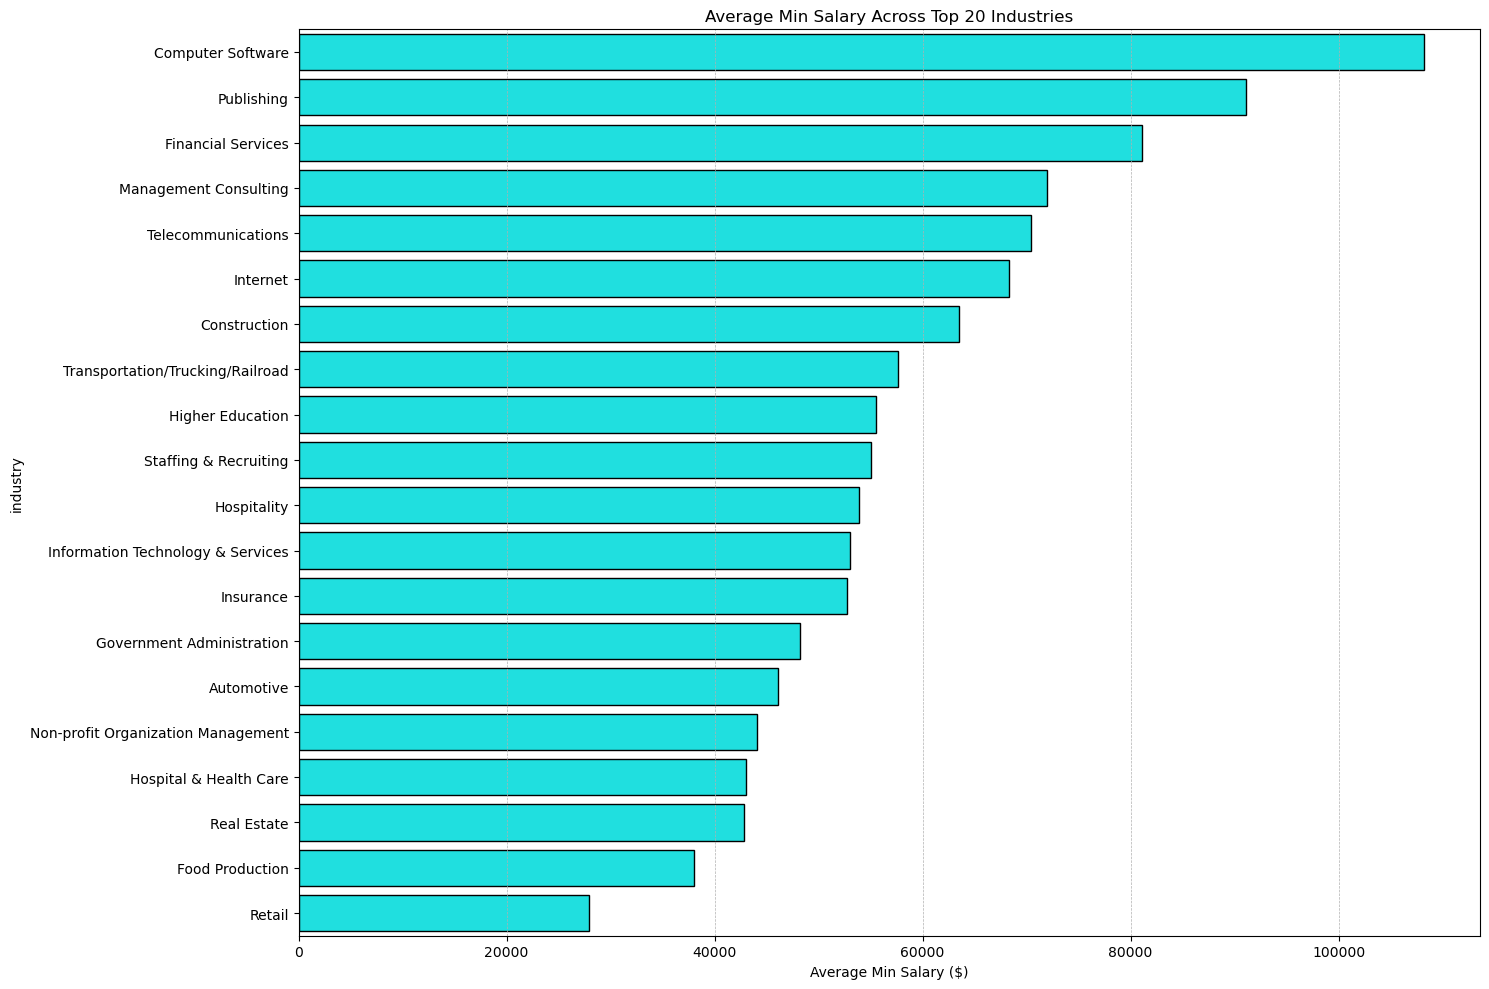

In [40]:


# Selecting the top 20 industries by the number of job offers
top_20_industries = subset_jobs_link['industry'].value_counts().head(20).index

# Filtering the data for these top 20 industries
top_20_data = subset_jobs_link[subset_jobs_link['industry'].isin(top_20_industries)]

# Computing the average min_salary for the top 20 industries
avg_salaries = top_20_data.groupby('industry')['min_salary'].mean().sort_values(ascending=False)

# Plotting a bar plot for the average min_salary across the top 20 industries
plt.figure(figsize=(15, 10))
sns.barplot(y=avg_salaries.index, x=avg_salaries.values, color='cyan', edgecolor='k')
plt.title('Average Min Salary Across Top 20 Industries')
plt.xlabel('Average Min Salary ($)')
plt.grid(axis='x', which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


#### NOTES: 

The "Information Technology & Services" industry is among the top industries in terms of average minimum salary, indicating competitive starting salaries in this sector.

Some industries, like "Investment Banking" and "Venture Capital & Private Equity", have higher average minimum salaries than the IT industry. However, these sectors are often associated with specialized roles and financial hubs, which can contribute to higher salaries.


#### NOTE 2: 
##### In the context of job platforms like LinkedIn, "Computer Software" might be categorized separately from "Information Technology & Services" to allow for more specific job targeting and industry analysis. However, in a broader context, both would fall under the umbrella of IT.

### How does the distribution of job experience levels (e.g., entry-level, mid-level, senior) in the IT sector compare to other industries?

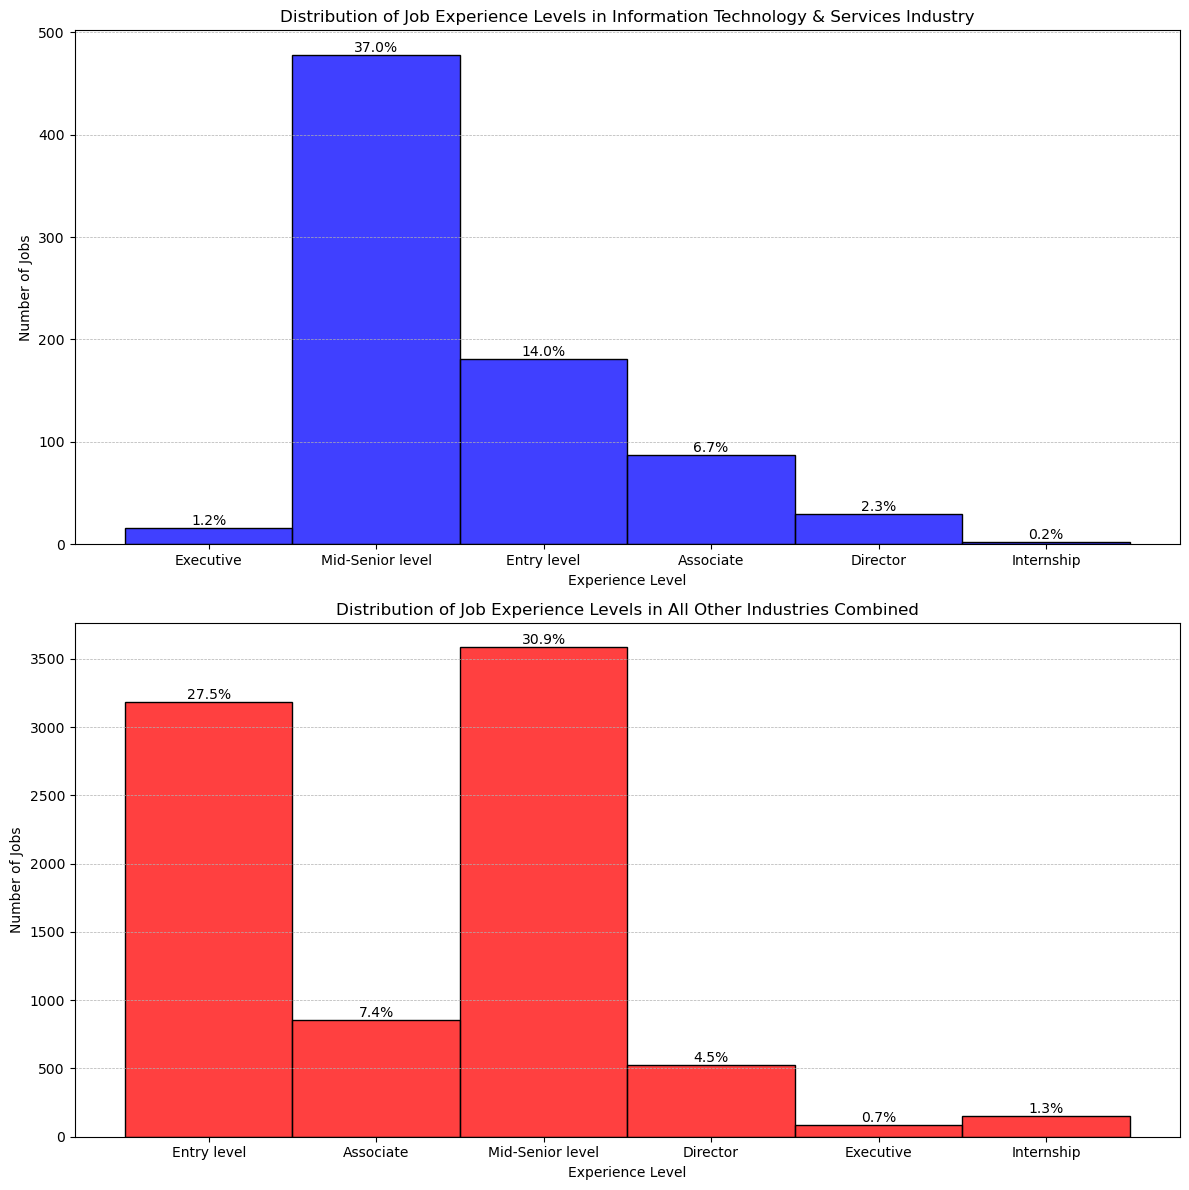

In [43]:

# Filtering the data for IT industry and other industries
it_experience_data = subset_jobs_link[subset_jobs_link['industry'] == "Information Technology & Services"]['formatted_experience_level']
other_experience_data = subset_jobs_link[subset_jobs_link['industry'] != "Information Technology & Services"]['formatted_experience_level']

# Function to annotate the bars with percentages
def annotate_bars(ax, total_count):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Plotting two separate histplots for the distribution of job experience levels with percentages
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Histogram for IT industry
sns.histplot(it_experience_data, ax=ax[0], color='blue', edgecolor='k')
ax[0].set_title('Distribution of Job Experience Levels in Information Technology & Services Industry')
ax[0].set_xlabel('Experience Level')
ax[0].set_ylabel('Number of Jobs')
ax[0].grid(axis='y', which='both', linestyle='--', linewidth=0.5)
annotate_bars(ax[0], len(it_experience_data))

# Histogram for all other industries combined
sns.histplot(other_experience_data, ax=ax[1], color='red', edgecolor='k')
ax[1].set_title('Distribution of Job Experience Levels in All Other Industries Combined')
ax[1].set_xlabel('Experience Level')
ax[1].set_ylabel('Number of Jobs')
ax[1].grid(axis='y', which='both', linestyle='--', linewidth=0.5)
annotate_bars(ax[1], len(other_experience_data))

plt.tight_layout()
plt.show()


#### NOTES:
Dominance of Entry-Level Positions:
Both in the IT industry and other industries combined, "Entry level" positions dominate, making up a significant percentage of the job offers. 

14% (IT)
27.5% (OTHER INDUSTRIES)


### Categorical plots

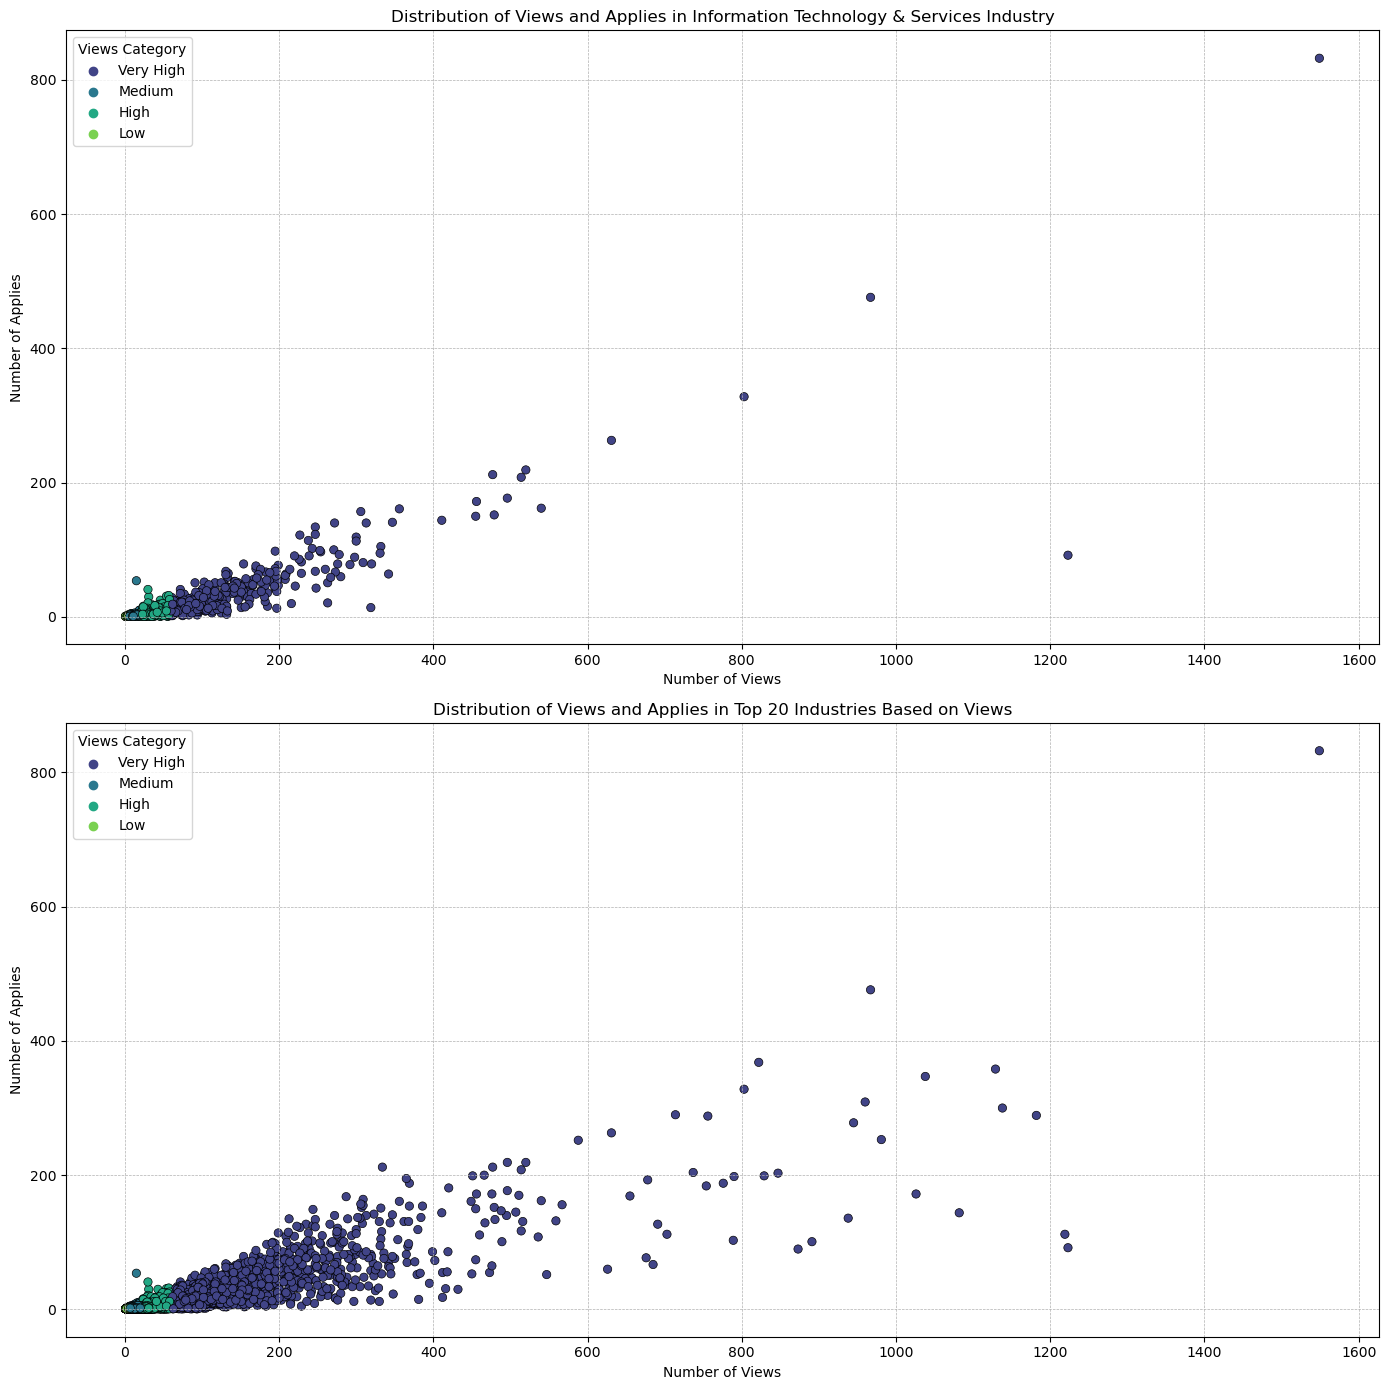

In [47]:
# Descriptive statistics for 'views' and 'applies' columns
views_desc = subset_jobs_link['views'].describe()
applies_desc = subset_jobs_link['applies'].describe()

# Function to categorize values based on quartiles
def categorize_values(value, desc):
    if value <= desc['25%']:
        return 'Low'
    elif value <= desc['50%']:
        return 'Medium'
    elif value <= desc['75%']:
        return 'High'
    else:
        return 'Very High'

# Categorizing 'views' and 'applies' columns
subset_jobs_link['views_category'] = subset_jobs_link['views'].apply(lambda x: categorize_values(x, views_desc))
subset_jobs_link['applies_category'] = subset_jobs_link['applies'].apply(lambda x: categorize_values(x, applies_desc))

# Filtering data for the IT industry and top 20 industries based on views
it_data = subset_jobs_link[subset_jobs_link['industry'] == "Information Technology & Services"]
top_20_industries_views = subset_jobs_link['industry'].value_counts().head(20).index
top_20_data_views = subset_jobs_link[subset_jobs_link['industry'].isin(top_20_industries_views)]

# Plotting scatter plots for IT industry and top 20 industries based on views
fig, ax = plt.subplots(2, 1, figsize=(14, 14))

# Scatter plot for IT industry
sns.scatterplot(data=it_data, x='views', y='applies', hue='views_category', palette='viridis', ax=ax[0], edgecolor='k')
ax[0].set_title('Distribution of Views and Applies in Information Technology & Services Industry')
ax[0].set_xlabel('Number of Views')
ax[0].set_ylabel('Number of Applies')
ax[0].legend(title='Views Category')
ax[0].grid(True, linestyle='--', linewidth=0.5)

# Scatter plot for top 20 industries based on views
sns.scatterplot(data=top_20_data_views, x='views', y='applies', hue='views_category', palette='viridis', ax=ax[1], edgecolor='k')
ax[1].set_title('Distribution of Views and Applies in Top 20 Industries Based on Views')
ax[1].set_xlabel('Number of Views')
ax[1].set_ylabel('Number of Applies')
ax[1].legend(title='Views Category')
ax[1].grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


### Hypothesis


#### Hypothesis: The IT industry tends to offer higher entry-level salaries compared to other industries.

#### Hypothesis:  IT sector have a high demand for mid_senior positions.

#### Hypothesis: The IT industry is the leading sector in terms of the number of job offers on LinkedIn.